In [15]:
import pandas as pd

In [16]:
import numpy as np

In [17]:
import sqlite3

In [18]:
con = sqlite3.connect(r"C:\Users\AVITA\Desktop\Kriti\Analysis Project\Project3-Zomato-Data-Analysis/zomato_rawdata.sqlite")

In [19]:
pd.read_sql_query("SELECT * FROM Users", con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [20]:
df = pd.read_sql_query("SELECT * FROM Users", con)

In [21]:
df.shape

(51717, 18)

In [22]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [23]:
# We have raw data so now we clean the data

In [24]:
#check if there is a null or not
df.isnull()
# True means there is a null value

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()
#dish_liked has many null values

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [26]:
#calcute percent of missing values
df.isnull().sum()/len(df)*100
# So dish liked has more than half of null values and we cannot drop all this since we will be removing almost half the data set. 

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [27]:
df['rate'].unique()
# we need to replace new and dash(none) because it doesn't make any sense

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
df['rate'].replace(('NEW','-'), np.nan,inplace=True)
# np.nan is a numpy method of showing null values

In [29]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [30]:
# Now we want just the rate eg we want 4.2 only not 4.2/5
"4.1/5".split('/')[0]

'4.1'

In [31]:
#lets check the type
type("4.1/5".split('/')[0])

str

In [32]:
# changing because we want float type
float("4.1/5".split('/')[0])

4.1

In [33]:
# so now using for all values
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [34]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [35]:
# Is there a relation between the online order option and the rating of the restaurant?
# meaning we are trying to make a table in which we can get all the order ratings and how many of those orders had online ordering option count
# also called a pivot table or cross-tabulation table
# uisng that table we can create a stack bar chart for visualization

In [36]:
x = pd.crosstab(df['rate'], df['online_order'])

In [37]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

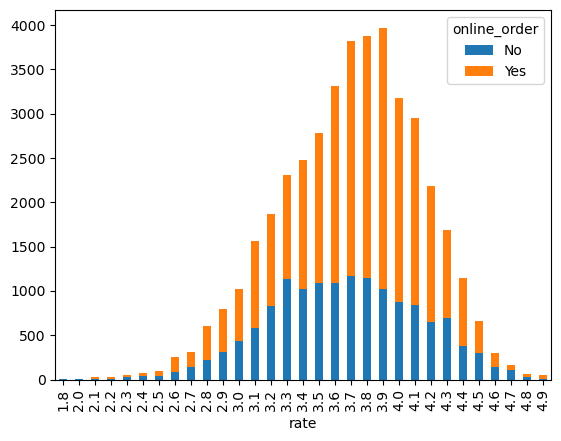

In [38]:
x.plot(kind='bar' , stacked=True)

In [39]:
# 100 percent stacked bar chart

In [40]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [41]:
normalize_df = x.div(x.sum(axis=1).astype(float), axis=0)

In [42]:
normalize_df*100

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

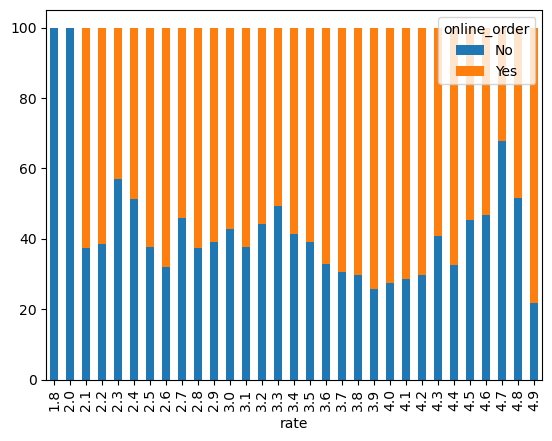

In [43]:
(normalize_df*100).plot(kind='bar' , stacked=True)

In [44]:
# Data cleaning to perform Text Analysis

In [45]:
df['rest_type'].isnull().sum()

227

In [46]:
data = df.dropna(subset=['rest_type'])

In [47]:
data['rest_type'].isnull().sum()

0

In [48]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [49]:
# we will do analysis on just one restaurant i.e. Quick Bites

In [50]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [51]:
data[data['rest_type'].str.contains('Quick Bites')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [52]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [53]:
quick_bites_df.shape

(20639, 18)

In [54]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [55]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [56]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

C:\Users\AVITA\AppData\Local\Temp\ipykernel_9568\4206969916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [57]:
from nltk.corpus import RegexpTokenizer

In [58]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [59]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [60]:
quick_bites_df['reviews_list'][3]

'[(\'rated 4.0\', "rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it\'s well managed............"), (\'rated 2.0\', \'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.\'), (\'rated 4.0\', \'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.\'), (\'rated 2.0\', \'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now com

In [61]:
# Get tokenized list
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [62]:
# We will now create a sample data of 10000 because big data will take a lot of time
sample = data[0:10000]

In [63]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [64]:
# Performing unigram analysis and removal of stopwords
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [65]:
import nltk

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AVITA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
from nltk.corpus import stopwords

In [68]:
stop = stopwords.words('english')

In [69]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
# we need to extend the stopword list because words like rated is repeated many times
stop.extend(['rated', 'n', 'nan', 'x', 'RATED' , 'Rated'])

In [71]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [72]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [73]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [74]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [75]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review: [token for token in rev3 if token not in stop])

In [76]:
reviews_tokens_clean

0        [Great, food, proper, Karnataka, style, full, ...
1        [Great, food, proper, Karnataka, style, full, ...
2        [Great, food, proper, Karnataka, style, full, ...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Great, food, proper, Karnataka, style, full, ...
                               ...                        
10046    [Great, food, proper, Karnataka, style, full, ...
10047    [Great, food, proper, Karnataka, style, full, ...
10048    [Great, food, proper, Karnataka, style, full, ...
10049    [Great, food, proper, Karnataka, style, full, ...
10050    [Great, food, proper, Karnataka, style, full, ...
Name: reviews_list, Length: 10000, dtype: object

In [77]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [78]:
total_reviews_2D = list(reviews_tokens_clean)

In [79]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [80]:
total_reviews_1D

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

In [81]:
from nltk import FreqDist

In [82]:
fd = FreqDist()

In [83]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [84]:
fd.most_common(20)

[('I', 670000),
 ('food', 590000),
 ('south', 270000),
 ('Indian', 230000),
 ('place', 210000),
 ('good', 210000),
 ('taste', 200000),
 ('served', 170000),
 ('The', 150000),
 ('variety', 130000),
 ('quality', 130000),
 ('still', 120000),
 ('There', 110000),
 ('people', 110000),
 ('meal', 110000),
 ('leaf', 110000),
 ('authentic', 100000),
 ('But', 100000),
 ('feel', 100000),
 ('much', 100000)]

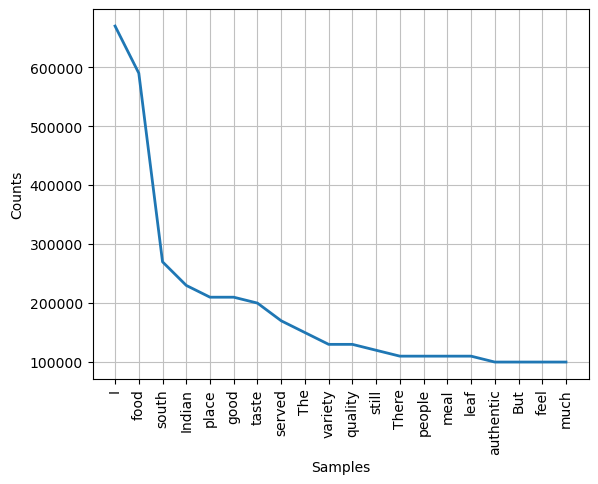

<Axes: xlabel='Samples', ylabel='Counts'>

In [85]:
fd.plot(20)

In [86]:
# Performing Bi-gram & Trigram analysis on data

In [87]:
from nltk import FreqDist, bigrams, trigrams

In [88]:
# FOR BIGRAM

In [89]:
bi_grams = bigrams(total_reviews_1D)

In [90]:
bi_grams

<generator object bigrams at 0x00000187BC517060>

In [91]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [92]:
fd_bigrams.most_common(20)

[(('south', 'Indian'), 230000),
 (('Indian', 'food'), 180000),
 (('waiting', 'staffs'), 100000),
 (('authentic', 'south'), 90000),
 (('food', 'served'), 70000),
 (('value', 'money'), 60000),
 (('food', 'quality'), 60000),
 (('quality', 'taste'), 60000),
 (('food', 'I'), 60000),
 (('Food', 'good'), 60000),
 (('Been', 'last'), 50000),
 (('last', 'week'), 50000),
 (('week', 'high'), 50000),
 (('high', 'expectations'), 50000),
 (('expectations', 'based'), 50000),
 (('based', 'reviews'), 50000),
 (('reviews', 'But'), 50000),
 (('But', 'utterly'), 50000),
 (('utterly', 'disappointed'), 50000),
 (('disappointed', 'food'), 50000)]

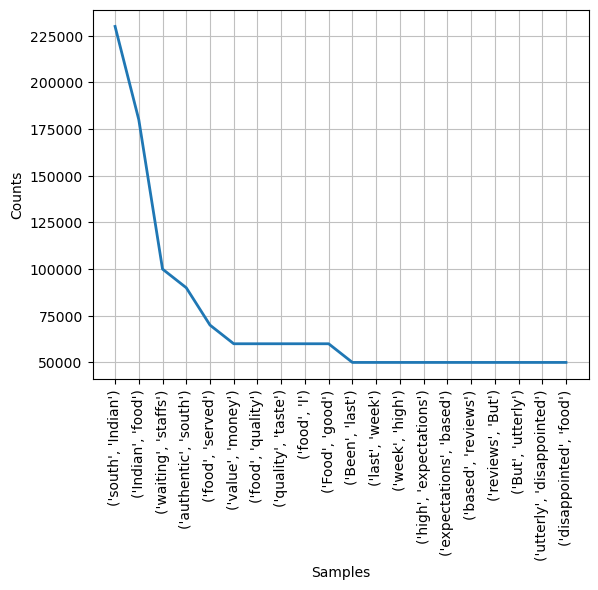

<Axes: xlabel='Samples', ylabel='Counts'>

In [93]:
fd_bigrams.plot(20)

In [94]:
# FOR TRIGRAM

In [95]:
tri_grams = trigrams(total_reviews_1D)

In [96]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [97]:
fd_trigrams.most_common(50)

[(('south', 'Indian', 'food'), 180000),
 (('authentic', 'south', 'Indian'), 70000),
 (('Indian', 'food', 'I'), 60000),
 (('Been', 'last', 'week'), 50000),
 (('last', 'week', 'high'), 50000),
 (('week', 'high', 'expectations'), 50000),
 (('high', 'expectations', 'based'), 50000),
 (('expectations', 'based', 'reviews'), 50000),
 (('based', 'reviews', 'But'), 50000),
 (('reviews', 'But', 'utterly'), 50000),
 (('But', 'utterly', 'disappointed'), 50000),
 (('utterly', 'disappointed', 'food'), 50000),
 (('disappointed', 'food', 'quality'), 50000),
 (('food', 'quality', 'taste'), 50000),
 (('quality', 'taste', 'I'), 50000),
 (('taste', 'I', 'feel'), 50000),
 (('I', 'feel', 'overhyped'), 50000),
 (('feel', 'overhyped', 'place'), 50000),
 (('overhyped', 'place', 'There'), 50000),
 (('place', 'There', 'many'), 50000),
 (('There', 'many', 'better'), 50000),
 (('many', 'better', 'places'), 50000),
 (('better', 'places', 'vicinity'), 50000),
 (('places', 'vicinity', 'Plantain'), 50000),
 (('vicinit

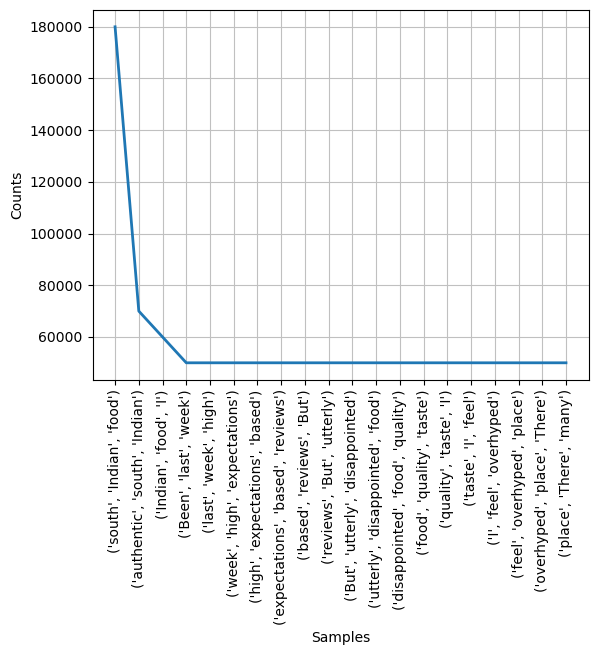

<Axes: xlabel='Samples', ylabel='Counts'>

In [98]:
fd_trigrams.plot(20)

In [99]:
# Extract geographical-coordinates from data

In [100]:
df.head(3)
# we will use this address and location column to do the analysis

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [101]:
!pip install geocoder
!pip install geopy

In [102]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [103]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [104]:
len(df['location'].unique())

94

In [105]:
df['location'] = df['location'] + " , Bangalore , Karnataka , India "
#Making full location with city, state and country respectively

In [106]:
df['location']

0            Banashankari , Bangalore , Karnataka , India 
1            Banashankari , Bangalore , Karnataka , India 
2            Banashankari , Bangalore , Karnataka , India 
3            Banashankari , Bangalore , Karnataka , India 
4            Basavanagudi , Bangalore , Karnataka , India 
                               ...                        
51712          Whitefield , Bangalore , Karnataka , India 
51713          Whitefield , Bangalore , Karnataka , India 
51714          Whitefield , Bangalore , Karnataka , India 
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51717, dtype: object

In [107]:
df_copy = df.copy()

In [108]:
df_copy['location'].isnull().sum()

21

In [109]:
df_copy = df_copy.dropna(subset=['location'])

In [110]:
df_copy['location'].isnull().sum()

0

In [111]:
locations = pd.DataFrame(df_copy['location'].unique())

In [112]:
locations.columns = ['name']

In [113]:
locations

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [114]:
!pip install geopy

In [115]:
from geopy.geocoders import Nominatim
import time

In [116]:
geolocator = Nominatim(user_agent="app" , timeout=None)

In [117]:
lat = []
lon = []

for location in locations['name']:
    try:
        geocode_result = geolocator.geocode(location)
        if geocode_result is None:
            lat.append(np.nan)
            lon.append(np.nan)
        else:
            lat.append(geocode_result.latitude)
            lon.append(geocode_result.longitude)
    except Exception as e:
        lat.append(np.nan)
        lon.append(np.nan)
        print(f"Error geocoding {location}: {e}")
    time.sleep(1)  # Sleep for 1 second to respect Nominatim's rate limit

locations['latitude'] = lat
locations['longitude'] = lon

# Display the DataFrame with latitude and longitude
print(locations)

                                                 name   latitude  longitude
0       Banashankari , Bangalore , Karnataka , India   12.939333  77.553982
1       Basavanagudi , Bangalore , Karnataka , India   12.941726  77.575502
2        Mysore Road , Bangalore , Karnataka , India   12.960381  77.557009
3          Jayanagar , Bangalore , Karnataka , India   12.941849  77.586898
4   Kumaraswamy Layout , Bangalore , Karnataka , I...  12.906768  77.559502
..                                                ...        ...        ...
88    West Bangalore , Bangalore , Karnataka , India   13.009476  77.553089
89       Magadi Road , Bangalore , Karnataka , India   12.975653  77.555355
90         Yelahanka , Bangalore , Karnataka , India   13.100698  77.596345
91    Sahakara Nagar , Bangalore , Karnataka , India   13.062147  77.580061
92            Peenya , Bangalore , Karnataka , India   13.032942  77.527325

[93 rows x 3 columns]


In [118]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.960381,77.557009
3,"Jayanagar , Bangalore , Karnataka , India",12.941849,77.586898
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [120]:
# Now lets build a geographical Heat-Maps
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [121]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [122]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [123]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [124]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [125]:
locations[locations['longitude'].isna()]

,name,latitude,longitude


In [126]:
df['cuisines'].isnull().sum()

45

In [127]:
df = df.dropna(subset=['cuisines'])

In [129]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [130]:
north_india.shape

(21085, 18)

In [131]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [141]:
north_india['location'].value_counts()

location
BTM , Bangalore , Karnataka , India                   2469
HSR , Bangalore , Karnataka , India                   1123
Whitefield , Bangalore , Karnataka , India            1059
Marathahalli , Bangalore , Karnataka , India          1038
JP Nagar , Bangalore , Karnataka , India               958
                                                      ... 
Hebbal , Bangalore , Karnataka , India                   4
Jakkur , Bangalore , Karnataka , India                   3
Central Bangalore , Bangalore , Karnataka , India        2
West Bangalore , Bangalore , Karnataka , India           1
Peenya , Bangalore , Karnataka , India                   1
Name: count, Length: 90, dtype: int64

In [144]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns = {'location':'name', 'count':'count'})

In [145]:
north_india_rest_count

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , In...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [137]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.960381,77.557009
3,"Jayanagar , Bangalore , Karnataka , India",12.941849,77.586898
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [146]:
north_india_rest_count.columns

Index(['name', 'count'], dtype='object')

In [147]:
heatmap_df = north_india_rest_count.merge(locations, on='name' , how='left')

In [148]:
heatmap_df

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.916360,77.604733
1,"HSR , Bangalore , Karnataka , India",1123,12.900563,77.649475
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , In...",2,12.973393,77.611247
88,"West Bangalore , Bangalore , Karnataka , India",1,13.009476,77.553089


In [150]:
!pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------------------------- --------- 81.9/108.4 kB 762.6 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 980.4 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 980.4 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 980.4 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 369.1 kB/s eta 0:00:00


In [151]:
import folium

In [152]:
basemap = folium.Map()

In [153]:
basemap

In [156]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [154]:
from folium.plugins import HeatMap

In [157]:
HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)

In [158]:
basemap

In [159]:
# how to automate your task : ie Performance Automation

In [161]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]

    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns = {'location':'name', 'count':'count'})
    heatmap_df = cuisine_rest_count.merge(locations, on='name' , how='left')
    print(heatmap_df.head(4))

    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)
    return basemap

In [162]:
get_heatmap('South Indian')

                                         name  count   latitude  longitude
0        BTM , Bangalore , Karnataka , India     815  12.916360  77.604733
1   JP Nagar , Bangalore , Karnataka , India     437  12.909694  77.586607
2        HSR , Bangalore , Karnataka , India     436  12.900563  77.649475
3  Jayanagar , Bangalore , Karnataka , India     416  12.941849  77.586898


In [163]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)